In [163]:
# Core libraries
import pandas as pd
import numpy as np

# Train / test split
from sklearn.model_selection import train_test_split

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

# Model persistence
import joblib

## 1. Chia thành 2 tập train và test

In [164]:
from sklearn.model_selection import train_test_split

# Load preprocessed dataset
DATA_PATH = "D:\\Lan Huong\\Cao hoc\\Nam 1\\Kì 1\\7.ML\\Huong\\02VC_Group_09\\datasets\\heart-disease\\heart_disease_clean.csv"
df = pd.read_csv(DATA_PATH)

X = df.drop(['target', 'target_binary'], axis=1)
y = df['target_binary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 212
Testing samples: 91


# 2. Thực nghiệm

## 2.1. Bagging
- Random Forest
- Bagging Classifier + SVM

### 2.1.1. Random Forest

In [165]:
from sklearn.ensemble import RandomForestClassifier

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
rf = RandomForestClassifier(
    n_estimators=200, # số cây trong rừng
    max_depth=None, # Độ sâu tối đa của mỗi cây
    random_state=42 # Giữ kết quả ổn định
)

rf.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [199]:
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]


c:\Users\KhanhToan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\KhanhToan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Chú trọng Recall vì Trong số bệnh nhân thực sự có bệnh, mô hình phát hiện được bao nhiêu.
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
results = []

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results.append({
    "model": "Random Forest",
    "accuracy": accuracy,
    "recall": recall,
    "precision" :precision,
    "f1_score" :f1
})

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"f1_score: {f1:.4f}")


# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6557
Recall: 0.2500
Precision: 1.0000
f1_score: 0.4000

Classification Report:
               precision    recall  f1-score   support

           0       0.61      1.00      0.76        33
           1       1.00      0.25      0.40        28

    accuracy                           0.66        61
   macro avg       0.81      0.62      0.58        61
weighted avg       0.79      0.66      0.59        61


Confusion Matrix:
[[33  0]
 [21  7]]


In [168]:
joblib.dump(rf, "D:\\Lan Huong\\Cao hoc\\Nam 1\\Kì 1\\7.ML\\Huong\\02VC_Group_09\\heart-disease\\heart_disease_random_forest.pkl")

['D:\\Lan Huong\\Cao hoc\\Nam 1\\Kì 1\\7.ML\\Huong\\02VC_Group_09\\heart-disease\\heart_disease_random_forest.pkl']

### 2.1.2. Bagging Classifier + SVM

In [169]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(
        kernel='rbf',
        C=1,
        gamma='scale',
        probability=False
    ))
])


In [170]:
from sklearn.ensemble import BaggingClassifier

bagging_svm = BaggingClassifier(
    estimator=svm,
    n_estimators=30,
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)


In [171]:
bagging_svm.fit(X_train, y_train)


,estimator,"Pipeline(step...', SVC(C=1))])"
,n_estimators,30
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,-1
,random_state,42
,verbose,0


In [ ]:
y_pred = bagging_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results.append({
    "model": "Bagging Classifier + SVM",
    "accuracy": accuracy,
    "recall": recall,
    "precision" :precision,
    "f1_score" :f1
})

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"f1_score: {f1:.4f}")


# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


c:\Users\KhanhToan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
c:\Users\KhanhToan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


TypeError: 'float' object is not callable

In [173]:
joblib.dump(bagging_svm, "D:\\Lan Huong\\Cao hoc\\Nam 1\\Kì 1\\7.ML\\Huong\\02VC_Group_09\\heart-disease\\heart_disease_bagging_svm.pkl")

['D:\\Lan Huong\\Cao hoc\\Nam 1\\Kì 1\\7.ML\\Huong\\02VC_Group_09\\heart-disease\\heart_disease_bagging_svm.pkl']

## 2.2. Boosting
- AdaBoost
- Gradient Boosting Classifier

### 2.2.1. AdaBoost

In [174]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Base learner
base_estimator = DecisionTreeClassifier(
    max_depth=1,
    random_state=42
)

# AdaBoost model
ada = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)

# Train
ada.fit(X_train, y_train)


,estimator,DecisionTreeC...ndom_state=42)
,n_estimators,100
,learning_rate,0.5
,algorithm,'deprecated'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [ ]:

# Predict
y_pred = ada.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results.append({
    "model": "AdaBoost",
    "accuracy": accuracy,
    "recall": recall,
    "precision" :precision,
    "f1_score" :f1
})

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"f1_score: {f1:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9016
Recall: 0.9286

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.87      0.93      0.90        28

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61


Confusion Matrix:
[[29  4]
 [ 2 26]]


In [176]:
joblib.dump(ada, "D:\\Lan Huong\\Cao hoc\\Nam 1\\Kì 1\\7.ML\\Huong\\02VC_Group_09\\heart-disease\\heart_disease_adaboost.pkl")

['D:\\Lan Huong\\Cao hoc\\Nam 1\\Kì 1\\7.ML\\Huong\\02VC_Group_09\\heart-disease\\heart_disease_adaboost.pkl']

### 2.2.2. Gradient Boosting Classifier

In [177]:
from sklearn.ensemble import GradientBoostingClassifier
# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Train
gb.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [ ]:

# Predict
y_pred = gb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results.append({
    "model": "GradientBoostingClassifier",
    "accuracy": accuracy,
    "recall": recall,
    "precision" :precision,
    "f1_score" :f1
})

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"f1_score: {f1:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8525
Recall: 0.9286

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.79      0.85        33
           1       0.79      0.93      0.85        28

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61


Confusion Matrix:
[[26  7]
 [ 2 26]]


In [179]:
joblib.dump(gb, "D:\\Lan Huong\\Cao hoc\\Nam 1\\Kì 1\\7.ML\\Huong\\02VC_Group_09\\heart-disease\\heart_disease_gradientboostingclassifier.pkl")

['D:\\Lan Huong\\Cao hoc\\Nam 1\\Kì 1\\7.ML\\Huong\\02VC_Group_09\\heart-disease\\heart_disease_gradientboostingclassifier.pkl']

## 2.3. Stacking
- Logistic + SVM + RF ==> LR
- CNN1 + CNN2 ==> MLP

### 2.3.1.Logistic + SVM + Random Forest → Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# Base learners
estimators = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('svm', Pipeline([
        ('scaler', StandardScaler()),
        ('svc', SVC(kernel='rbf', probability=True, random_state=42))
    ])),
    ('rf', RandomForestClassifier(
        n_estimators=200,
        random_state=42
    ))
]

# Meta learner
meta_model = LogisticRegression(max_iter=1000)

# Stacking model
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_model,
    cv=5,
    stack_method='predict_proba',
    n_jobs=-1
)

# Huấn luyện
stacking_clf.fit(X_train, y_train)

Recall Stacking (LR + SVM + RF → LR): 0.9285714285714286


In [ ]:

# Predict
y_pred = stacking_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results.append({
    "model": "LR + SVM + RF → LR",
    "accuracy": accuracy,
    "recall": recall,
    "precision" :precision,
    "f1_score" :f1
})

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"f1_score: {f1:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8689
Recall: 0.9286

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61


Confusion Matrix:
[[27  6]
 [ 2 26]]


In [182]:
joblib.dump(stacking_clf, "D:\\Lan Huong\\Cao hoc\\Nam 1\\Kì 1\\7.ML\\Huong\\02VC_Group_09\\heart-disease\\heart_disease_stacking_1.pkl")

['D:\\Lan Huong\\Cao hoc\\Nam 1\\Kì 1\\7.ML\\Huong\\02VC_Group_09\\heart-disease\\heart_disease_stacking_1.pkl']

# 3.3.2. CNN1 + CNN2 → MLP

In [183]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score


In [184]:
# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Chuẩn hóa
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape cho CNN1D
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [185]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam


In [186]:
def build_cnn1(input_shape):
    inp = Input(shape=input_shape)
    x = Conv1D(32, kernel_size=3, activation='relu')(inp)
    x = MaxPooling1D(2)(x)
    x = Flatten()(x)
    x = Dense(32, activation='relu')(x)
    out = Dense(1, activation='sigmoid')(x)

    model = Model(inp, out)
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['Recall']
    )
    return model


In [187]:
def build_cnn2(input_shape):
    inp = Input(shape=input_shape)
    x = Conv1D(64, kernel_size=3, activation='relu')(inp)
    x = Conv1D(64, kernel_size=3, activation='relu')(x)
    x = MaxPooling1D(2)(x)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    out = Dense(1, activation='sigmoid')(x)

    model = Model(inp, out)
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['Recall']
    )
    return model


In [188]:
cnn1 = build_cnn1(X_train_cnn.shape[1:])
cnn2 = build_cnn2(X_train_cnn.shape[1:])

cnn1.fit(X_train_cnn, y_train, epochs=30, batch_size=16, verbose=0)
cnn2.fit(X_train_cnn, y_train, epochs=30, batch_size=16, verbose=0)


In [189]:
# Xác suất dự đoán
cnn1_train_pred = cnn1.predict(X_train_cnn)
cnn2_train_pred = cnn2.predict(X_train_cnn)

cnn1_test_pred = cnn1.predict(X_test_cnn)
cnn2_test_pred = cnn2.predict(X_test_cnn)

# Ghép lại
X_meta_train = np.hstack([cnn1_train_pred, cnn2_train_pred])
X_meta_test = np.hstack([cnn1_test_pred, cnn2_test_pred])


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [190]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

mlp = Sequential([
    Dense(16, activation='relu', input_shape=(X_meta_train.shape[1],)),
    Dense(1, activation='sigmoid')
])

mlp.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['Recall']
)

mlp.fit(X_meta_train, y_train, epochs=30, batch_size=16, verbose=0)


c:\Users\KhanhToan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

# Predict
y_pred_prob = mlp.predict(X_meta_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results.append({
    "model": "CNN1 + CNN2 → MLP",
    "accuracy": accuracy,
    "recall": recall,
    "precision" :precision,
    "f1_score" :f1
})

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"f1_score: {f1:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Accuracy: 0.8689
Recall: 0.9643

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.79      0.87        33
           1       0.79      0.96      0.87        28

    accuracy                           0.87        61
   macro avg       0.88      0.88      0.87        61
weighted avg       0.89      0.87      0.87        61


Confusion Matrix:
[[26  7]
 [ 1 27]]


In [192]:
joblib.dump(mlp, "D:\\Lan Huong\\Cao hoc\\Nam 1\\Kì 1\\7.ML\\Huong\\02VC_Group_09\\heart-disease\\heart_disease_stacking_2.pkl")

['D:\\Lan Huong\\Cao hoc\\Nam 1\\Kì 1\\7.ML\\Huong\\02VC_Group_09\\heart-disease\\heart_disease_stacking_2.pkl']

In [193]:
results
results_df = pd.DataFrame(results)


In [194]:
results_df

,model,accuracy,recall
0,Random Forest,0.901639,0.964286
1,Bagging Classifier + SVM,0.868852,0.892857
2,AdaBoost,0.901639,0.928571
3,GradientBoostingClassifier,0.852459,0.928571
4,LR + SVM + RF → LR,0.868852,0.928571
5,CNN1 + CNN2 → MLP,0.868852,0.964286


<Figure size 1000x500 with 0 Axes>

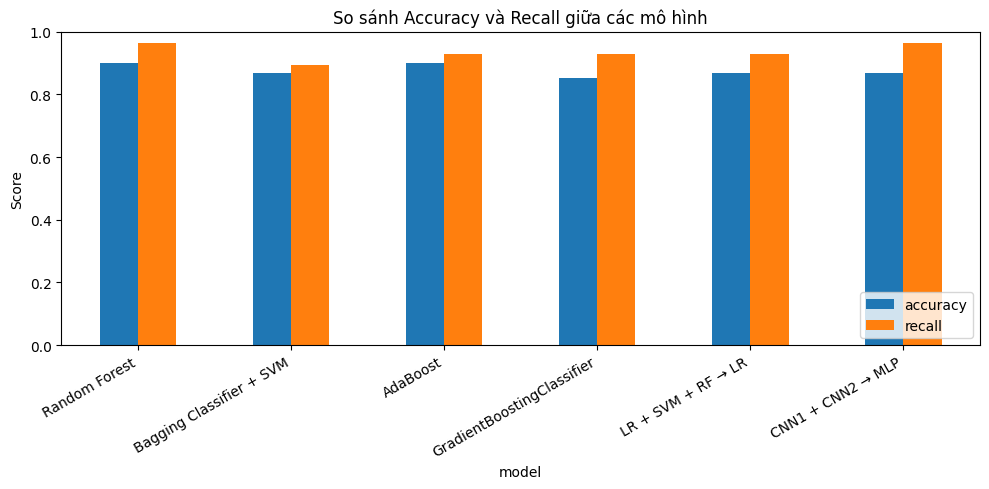

In [195]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

results_df.set_index("model")[["accuracy", "recall"]].plot(
    kind="bar",
    figsize=(10,5)
)

plt.title("So sánh Accuracy và Recall giữa các mô hình")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=30, ha="right")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()
